# Import Packages

In [1]:
import numpy as np
import pandas as pd
import locale
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

# Import Data

Use `encoding='latin1'` for reading raw data from github.

In [2]:
imdb = pd.read_csv("https://raw.githubusercontent.com/scalabretta/GroupProject--IMDB/master/Dataset/IMDB-database-update.csv", encoding="latin1")

# Session 4a: Exercise

## How many rows and columns reflected on dataset file IMDB-database-update.csv?

In [3]:
print(str.ljust("Total number of rows: ", 20), str.rjust("{}".format(imdb.shape[0]), 10))
print(str.ljust("Total number of rows: ", 20), str.rjust("{}".format(imdb.shape[1]), 10))

Total number of rows:        3781
Total number of rows:          36


## What are the top 3 movies with highest nett profit in 2015? 

Change `use_cleansing = True` if want to use cleansing.

In [4]:
use_cleansing = True

In [5]:
if use_cleansing == True:
    def convert_to_categorical(df, cat_limit=100):
        for col in df.columns:
            if (df[col].dtype == 'O'):
                if (df[col].nunique() <= cat_limit):
                    df[col] = df[col].astype('category')
                    print("Column {} casted to categorical".format(col))

    convert_to_categorical(imdb)
    imdb = imdb.drop_duplicates(subset='movie_title')

Column country casted to categorical
Column language casted to categorical
Column content_rating casted to categorical
Column director_top20? casted to categorical


In [6]:
ans = imdb[imdb['title_year'] == 2015][['movie_title', 'net_USD']].sort_values(by=['net_USD'], ascending=False).head(3)
for val in ans.values:
    k, v = val
    print(str.ljust(k, 30), str.rjust("{}".format(locale.currency(v, grouping=True)), 20))

Jurassic World                      $502,177,271.00
Minions                             $262,029,560.00
Avengers: Age of Ultron             $208,991,599.00


## What are the top 3 movies with highest gross profit in 2016?

In [7]:
ans = imdb[imdb['title_year'] == 2016][['movie_title', 'gross_USD']].sort_values(by=['gross_USD'], ascending=False).head(3)
for val in ans.values:
    k, v = val
    print(str.ljust(k, 30), str.rjust("{}".format(locale.currency(v, grouping=True)), 20))

Captain America: Civil War          $407,197,282.00
Deadpool                            $363,024,263.00
The Jungle Book                     $362,645,141.00


## How many non-english movies are in the dataset?

In [8]:
print("There is a total of: {}".format(imdb[imdb['language'] != 'English'].shape[0]))

There is a total of: 152


## What are top 3 languages in the data set aside English (based on number of movies)?

In [9]:
imdb[imdb['language'] != 'English']['language'].value_counts().head(3)

French      33
Spanish     23
Mandarin    13
Name: language, dtype: int64

## What are the top 3 countries with the highest nett profit in all dataset times?

In [10]:
ans = imdb.groupby('country')['net_USD'].sum().sort_values(ascending=False).head(3)
for key, val in zip(list(ans.index), ans.values):
    print(str.ljust(key, 10), str.rjust("{}".format(locale.currency(val, grouping=True)), 20))

USA          $50,330,300,012.00
UK            $1,279,724,445.00
Canada          $232,040,577.00


## What are the average budget of all movies in dataset in 2015?

In [11]:
avg_budget_2015 = locale.currency(imdb[imdb['title_year'] == 2015]['budget_USD'].mean(), grouping=True)
print("Average budget of all movies in 2015: {}".format(avg_budget_2015))

Average budget of all movies in 2015: $52,102,458.33


## What are the average budget of all movies in dataset in 2016?

In [12]:
avg_budget_2016 = locale.currency(imdb[imdb['title_year'] == 2016]['budget_USD'].mean(), grouping=True)
print("Average budget of all movies in 2016: {}".format(avg_budget_2016))

Average budget of all movies in 2016: $66,014,754.10


## Which one is higher, average budget of all movies in dataset in 2015 or 2016?

In [13]:
if (avg_budget_2016 > avg_budget_2015):
    print("Average budget in 2016 is higher than average budget in 2015")
else:
    print("Average budget in 2015 is higher than average budget in 2016")

Average budget in 2016 is higher than average budget in 2015


## What movie that resulted highest nett profit of all dataset times? How much did the movie make? 

In [14]:
movie, net_USD = imdb.loc[imdb['net_USD'].idxmax(), ["movie_title", "net_USD"]].values
print(str.ljust(movie, 10), str.rjust("{}".format(locale.currency(net_USD, grouping=True)), 20))

Avatar          $523,505,847.00


# Session 4a: Use Case

Import interactive plotting `plotly` and make custom function to observe distribution for each variable.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def dist_plot_binary(x1, x2):
    # Group data together
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    sns.distplot(x1, ax=ax)
    sns.distplot(x2, ax=ax)
    plt.legend(labels=["High", "Low"])
    plt.show()

In [17]:
def dist_box_plot(x1, x2):
    fig, ax = plt.subplots(2, 1, figsize=(14, 6))
    sns.boxplot(x1, ax=ax[0])
    sns.boxplot(x2, ax=ax[1])
    plt.show()

## Target column creation

Create target column `score_group` defined for movie with `imdb_score` higher than 7.5

In [18]:
col_target = 'score_group'
imdb[col_target] = ["High" if x else "Low" for x in imdb['imdb_score'] > 7.5]
high_mask= imdb[col_target] == 'High'

## Numerical Columns

In [19]:
cols_num = imdb.select_dtypes(include=[np.number]).columns
cols_num = [x for x in cols_num if x not in ['movie_ID', 'imdb_score', col_target]]
cols_num

['duration',
 'color',
 'title_year',
 'budget_USD',
 'gross_USD',
 'net_USD',
 'profitable',
 'director_facebook?',
 'director_facebook_likes',
 'actor_top20?',
 'actor_1_facebook?',
 'actor_1_facebook_likes',
 'actor_top20?.1',
 'actor_2_facebook?',
 'actor_2_facebook_likes',
 'actor_top20?.2',
 'actor_3_facebook?',
 'actor_3_facebook_likes',
 'cast_total_facebook_likes',
 'movie_facebook?',
 'movie_facebook_likes;',
 'facenumber_in_poster',
 'num_voted_users',
 'num_user_for_reviews',
 'imdb_top_250']

### Duration

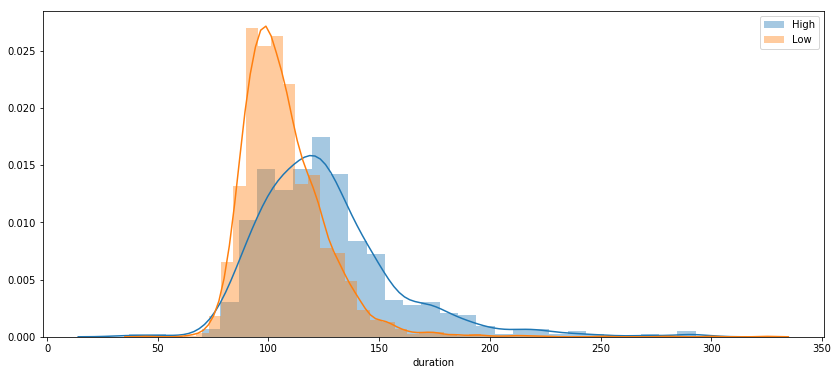

In [20]:
dist_plot_binary(imdb[high_mask][cols_num[0]], imdb[~high_mask][cols_num[0]])

### Title Year

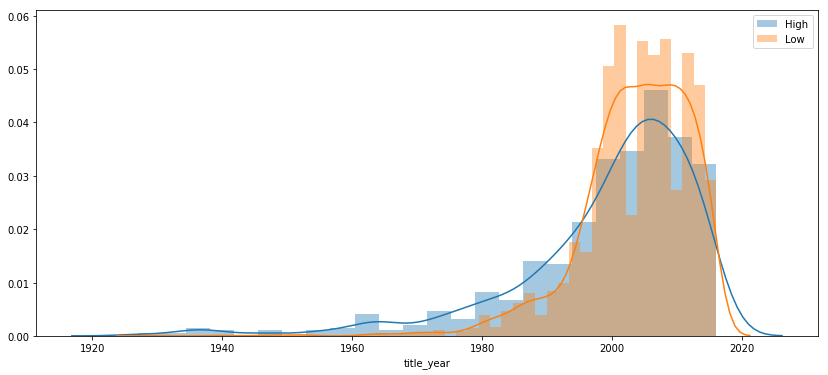

In [21]:
dist_plot_binary(imdb[high_mask][cols_num[2]], imdb[~high_mask][cols_num[2]])

### Budget USD

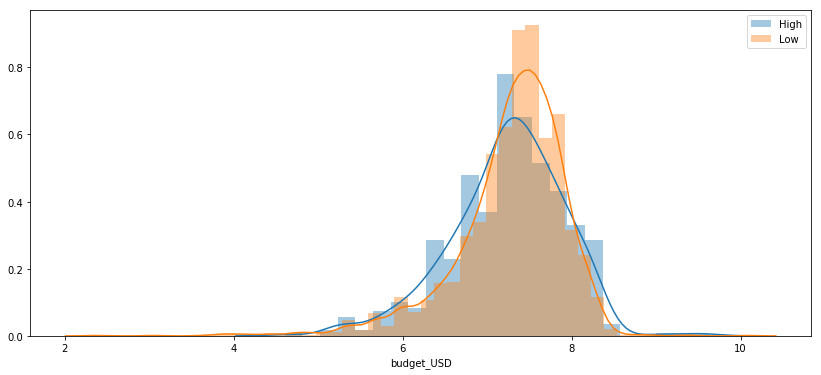

In [22]:
dist_plot_binary(np.log10(imdb[high_mask]['budget_USD']), np.log10(imdb[~high_mask]['budget_USD']))

### Net USD

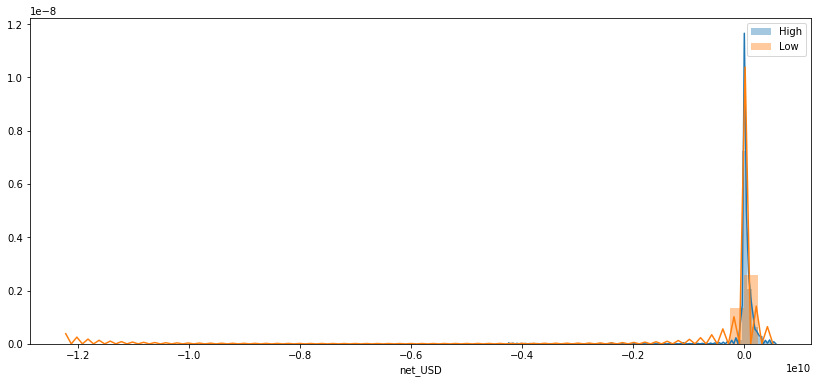

In [23]:
dist_plot_binary((imdb[high_mask]['net_USD']), (imdb[~high_mask]['net_USD']))

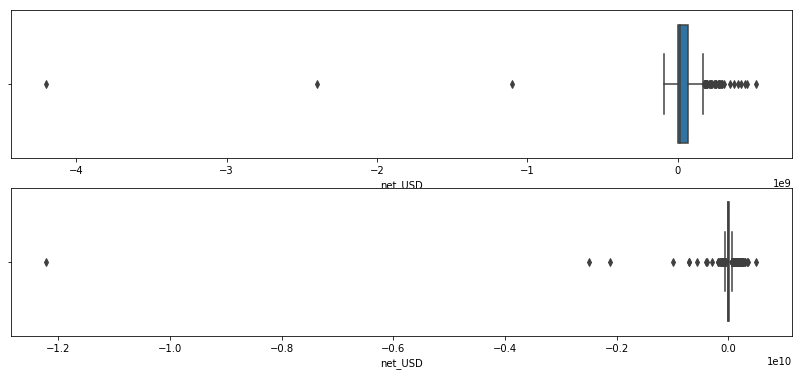

In [24]:
dist_box_plot(imdb[high_mask]['net_USD'], imdb[~high_mask]['net_USD'])

### director_facebook_likes

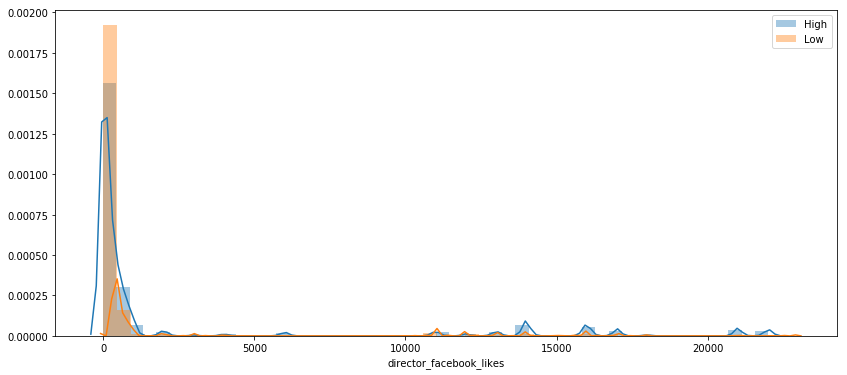

In [25]:
dist_plot_binary((imdb[high_mask]['director_facebook_likes'].dropna()), (imdb[~high_mask]['director_facebook_likes'].dropna()))

### actor_1_facebook_likes

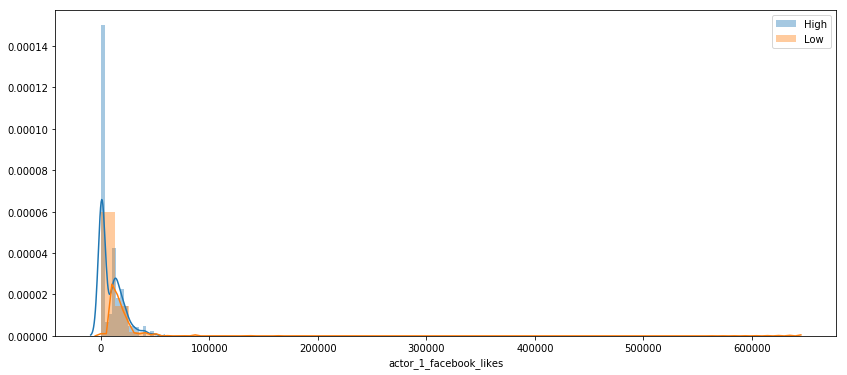

In [26]:
dist_plot_binary((imdb[high_mask]['actor_1_facebook_likes']), (imdb[~high_mask]['actor_1_facebook_likes']))

### actor_2_facebook_likes

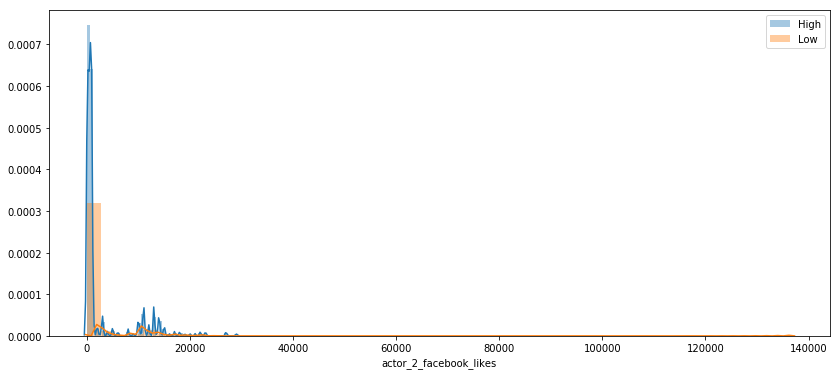

In [27]:
dist_plot_binary((imdb[high_mask]['actor_2_facebook_likes']), (imdb[~high_mask]['actor_2_facebook_likes']))

### cast_total_facebook_likes

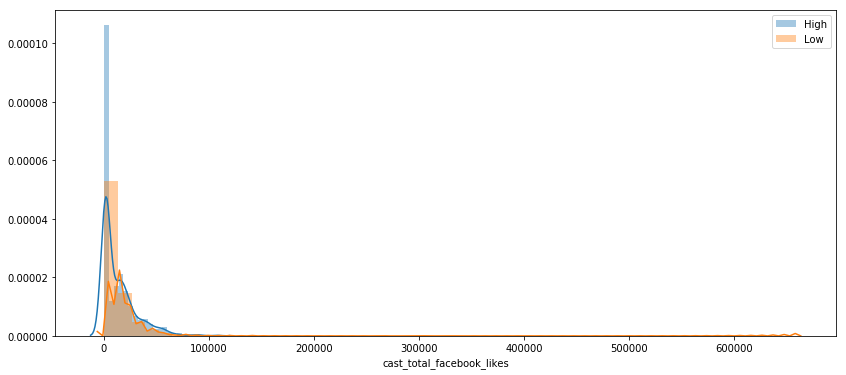

In [28]:
dist_plot_binary((imdb[high_mask]['cast_total_facebook_likes']), (imdb[~high_mask]['cast_total_facebook_likes']))

### movie_facebook_likes;

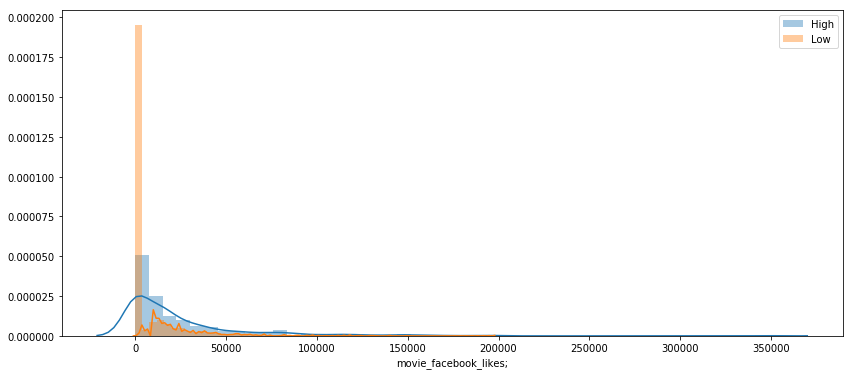

In [29]:
dist_plot_binary((imdb[high_mask]['movie_facebook_likes;']), (imdb[~high_mask]['movie_facebook_likes;']))

### facenumber_in_poster

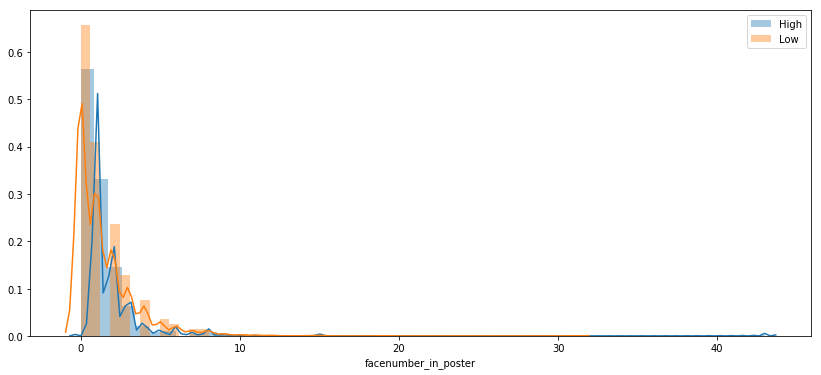

In [30]:
dist_plot_binary((imdb[high_mask]['facenumber_in_poster']), (imdb[~high_mask]['facenumber_in_poster']))

### num_voted_users

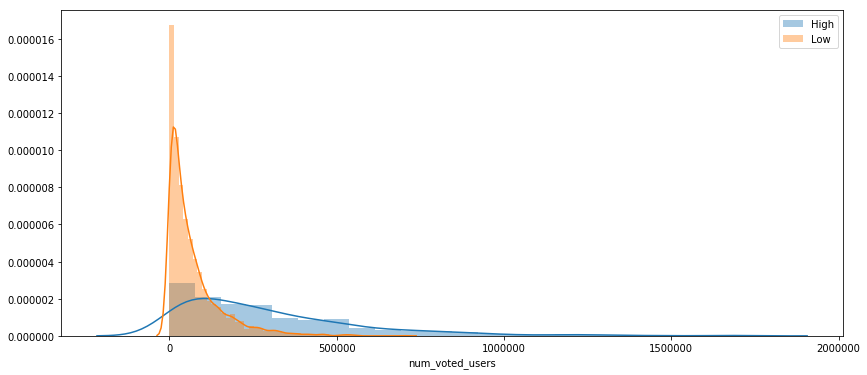

In [31]:
dist_plot_binary((imdb[high_mask]['num_voted_users']), (imdb[~high_mask]['num_voted_users']))

### num_user_for_reviews

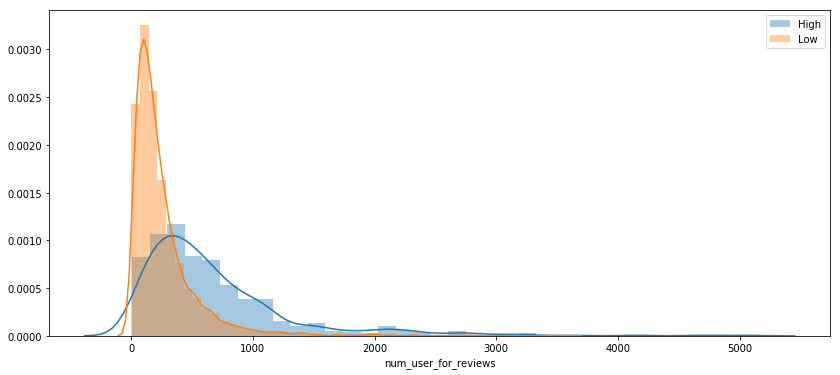

In [32]:
dist_plot_binary((imdb[high_mask]['num_user_for_reviews']), (imdb[~high_mask]['num_user_for_reviews']))